# PROJECT:Census Income Data Set

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given train data
df = pd.read_csv('train.csv',names= ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])


In [3]:
#Lets see the first 5 rows of the  train data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Lets create a dataframe from given test data
dft = pd.read_csv('test.csv',names= ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])


In [5]:
#Lets see the first 5 rows of the  test data
dft.head()
#good to see that both have same columns

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#Lets check the shape of the train data
df.shape
# There are 14 features and 1 Target(income) and have 32561

(32561, 15)

In [7]:
#Lets check the shape of the test data
dft.shape
# There are 14 features and 1 Target(income) and have 16281

(16281, 15)

In [8]:
# Lets check the datatypes of data
df.dtypes 


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational-num    32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#there are several ? in few columns
df.replace(' ?',np.NaN,inplace=True)


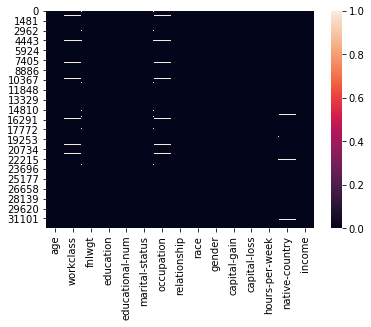

In [11]:
# Lets check the missing values in training data
sns.heatmap(df.isnull())
plt.show()
#seems there are missing values in the workclass, occupation and native country

In [12]:
# Lets confirm about missing value once more
df.isnull().sum()


age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [13]:
#Lets find mode of 'workclass
df['workclass'].mode()

0     Private
dtype: object

In [14]:
#Lets fill the missing values with mode
df['workclass'].fillna('Private',inplace=True)

In [15]:
#Lets find mode of occupation
df['occupation'].mode()

0     Prof-specialty
dtype: object

In [16]:
#Lets fill the missing values with mode
df['occupation'].fillna('Prof-specialty',inplace=True)

In [17]:
#Lets find mode of native-country
df['native-country'].mode()

0     United-States
dtype: object

In [18]:
#Lets fill the missing values with mode
df['native-country'].fillna('United-States',inplace=True)

In [19]:
#Lets confirm there are no missing values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
#Lets repeat the process for test data as well

dft.replace(' ?',np.NaN,inplace=True)

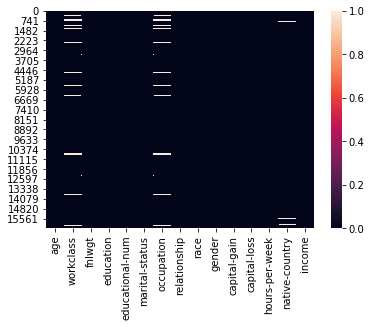

In [21]:
# Lets check the missing values in test data
sns.heatmap(dft.isnull())
plt.show()
#seems there are missing values in the workclass, occupation and native country

In [22]:
#Lets imput the missing values
dft['workclass'].fillna('Private',inplace=True)
dft['occupation'].fillna('Prof-specialty',inplace=True)
dft['native-country'].fillna('United-States',inplace=True)

In [23]:
# Lets confirm about missing value once more
dft.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [24]:
# Lets see the descriptive statistics of train data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
# Lets see the descriptive statistics of test data
dft.describe()
# great to see that we can see that train and test data have similar stats

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [26]:
#Lets see the correlation among the different features as well 
df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
educational-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


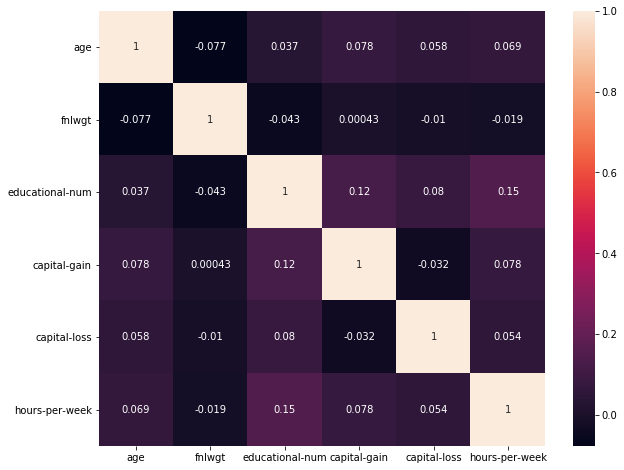

In [27]:
# lets visualize the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


In [28]:
# Lets see income distribution
df['income'].value_counts()
# we can see that data is imbalanced

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000040E41CA8D0>,
      dtype=object)

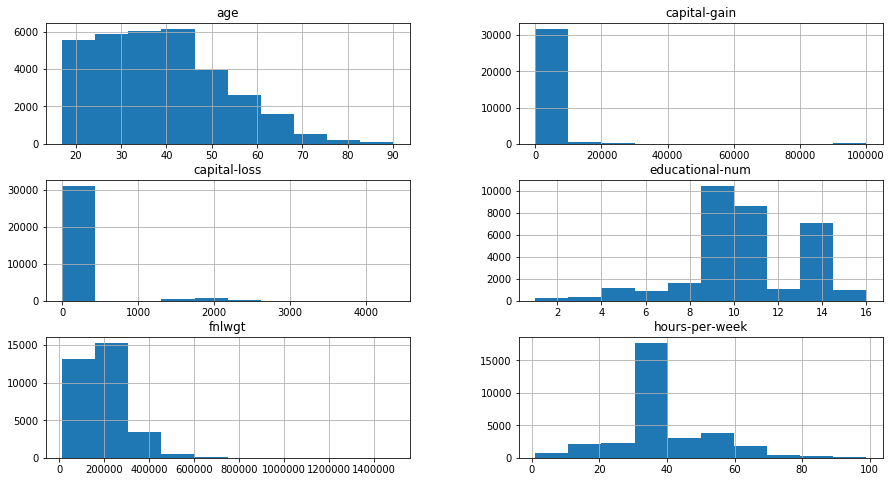

In [29]:
# # Univariate histogram of all numeric variables
df.hist(figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000040E4721748>,
      dtype=object)

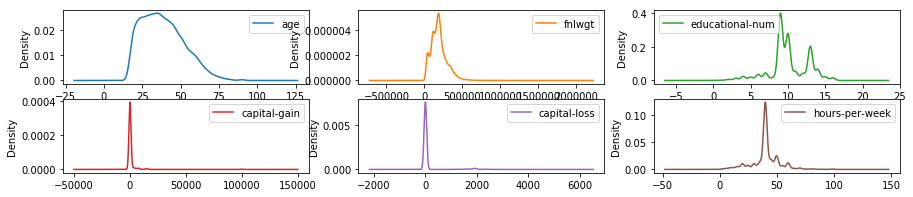

In [30]:
# # Univariate Density Plots of all numeric(non categorical) variables
df.plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize=(15,3))



In [31]:
# we can see from above histograms and density plots that for capital gain and capital losses are concentrated on zero
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

age                   AxesSubplot(0.125,0.125;0.110714x0.755)
capital-gain       AxesSubplot(0.257857,0.125;0.110714x0.755)
capital-loss       AxesSubplot(0.390714,0.125;0.110714x0.755)
educational-num    AxesSubplot(0.523571,0.125;0.110714x0.755)
fnlwgt             AxesSubplot(0.656429,0.125;0.110714x0.755)
hours-per-week     AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

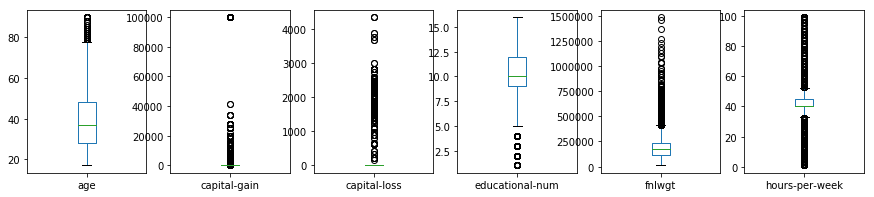

In [32]:
#Lets plot the box plot of each numeric variable
df[['age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']].plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False, figsize=(15,3))
#There seems the presence of lot of outliers in the data

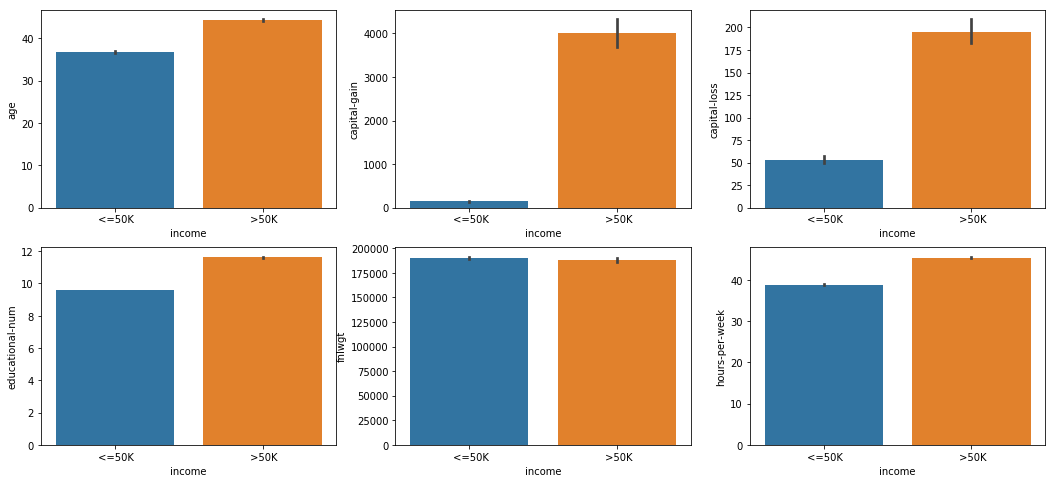

In [33]:
#Lets visualize relation of numeric paramters with respect to 'income'
f,axes= plt.subplots(2,3, figsize=(18,8))
sns.barplot(x='income', y ='age', data=df,ax=axes[0,0])
sns.barplot(x='income', y ='capital-gain', data=df, ax=axes[0,1])
sns.barplot(x='income', y ='capital-loss', data=df, ax=axes[0,2])
sns.barplot(x='income', y ='educational-num', data=df, ax=axes[1,0])
sns.barplot(x='income', y ='fnlwgt', data=df, ax=axes[1,1])
sns.barplot(x='income', y ='hours-per-week', data=df, ax=axes[1,2])



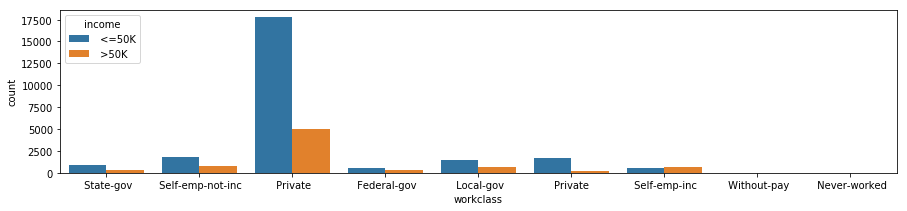

In [34]:
#Lets visualize relation of workclass with respect to 'income'
plt.figure(figsize=(15,3))
sns.countplot(x='workclass', hue ='income', data=df)


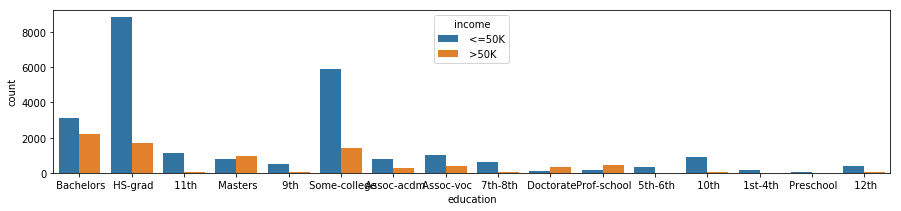

In [35]:
#Lets visualize relation of education with respect to 'income'
plt.figure(figsize=(15,3))
sns.countplot(x='education', hue ='income', data=df)


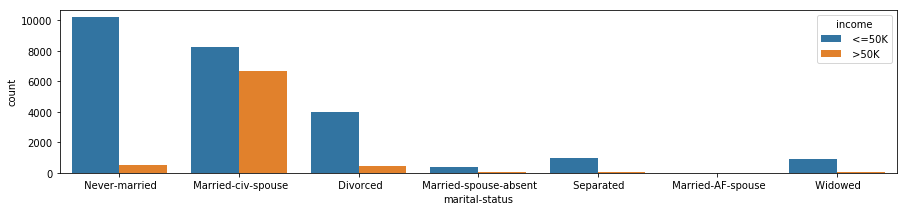

In [36]:
#Lets visualize relation of marital-status with respect to 'income'
plt.figure(figsize=(15,3))

sns.countplot(x='marital-status', hue ='income', data=df)


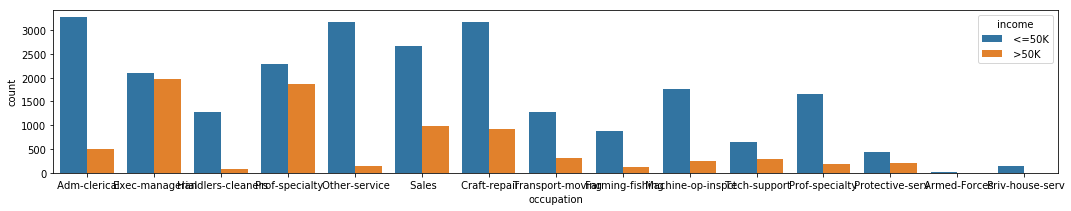

In [37]:
#Lets visualize relation of occupation with respect to 'income'
plt.figure(figsize=(18,3))
sns.countplot(x='occupation', hue ='income', data=df)


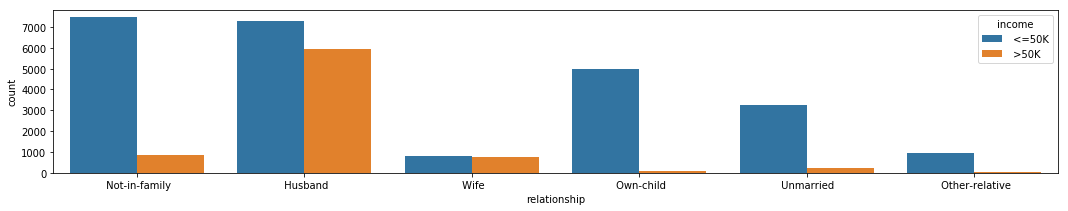

In [38]:
#Lets visualize relation of relationship with respect to 'income'
plt.figure(figsize=(18,3))
sns.countplot(x='relationship', hue ='income', data=df)


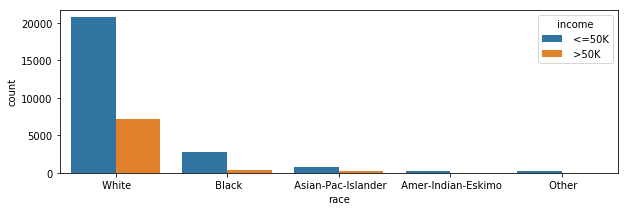

In [39]:
#Lets visualize relation of race with respect to 'income'
plt.figure(figsize=(10,3))
sns.countplot(x='race', hue ='income', data=df)


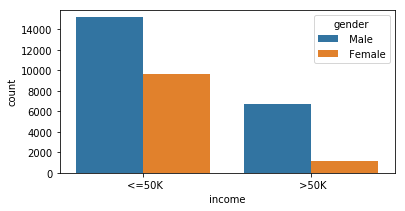

In [40]:
#Lets visualize relation of gender with respect to 'income'
plt.figure(figsize=(6,3))
sns.countplot(x='income', hue ='gender', data=df)

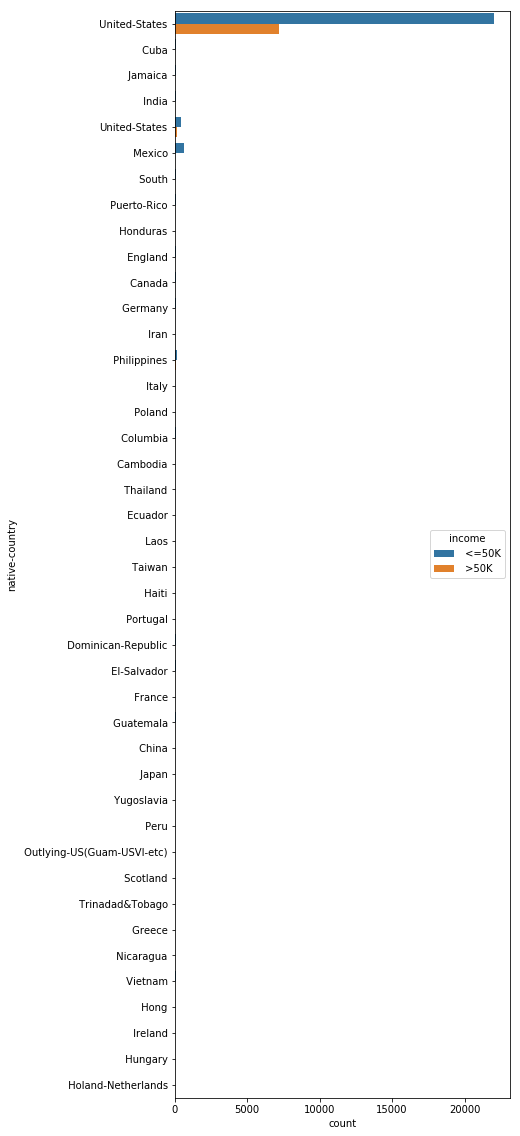

In [41]:
#Lets visualize relation of native country with respect to 'income'
plt.figure(figsize=(6,20))
sns.countplot(y='native-country', hue ='income', data=df)
# one thing we can be sure that most of people are from USA

In [42]:
#Lets check the skewness in Train data
df.skew()

age                 0.558743
fnlwgt              1.446980
educational-num    -0.311676
capital-gain       11.953848
capital-loss        4.594629
hours-per-week      0.227643
dtype: float64

In [43]:
#Lets create a list of columsn whose skewness has to be removed
columsskewed = ['fnlwgt','capital-gain','capital-loss']

In [44]:
#As these are positively skewed, lets reduce the skewness OF TRAIN DATA
for  i in columsskewed:
    df[i]=np.power(df[i],1/3)

In [45]:
#Lets check the skewness again
df.skew()
# skewness has come down but in variables capital-gain and capital loss it was too high

age                0.558743
fnlwgt            -0.164111
educational-num   -0.311676
capital-gain       4.099578
capital-loss       4.337076
hours-per-week     0.227643
dtype: float64

In [46]:
#Lets check the skewness of test data
dft.skew()


age                 0.554579
fnlwgt              1.422954
educational-num    -0.326338
capital-gain       11.778293
capital-loss        4.520647
hours-per-week      0.260419
dtype: float64

In [47]:
#Lets reduce the skewness OF TEST DATA
for  i in columsskewed:
    dft[i]=np.power(dft[i],1/3)

In [48]:
#Lets check the skewness
dft.skew()
#similar to train data skewness has been reduced but few variables originaaly had very high

age                0.554579
fnlwgt            -0.149820
educational-num   -0.326338
capital-gain       4.218826
capital-loss       4.317739
hours-per-week     0.260419
dtype: float64

In [49]:
#Lets check the columns education and education-num
df[['education','educational-num']].head(10)

,education,educational-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [50]:
#we can clearly see that education has been encoded into enducational-num already so dont need it, so lets drop it
df.drop('education',axis=1,inplace=True)

In [51]:
#Lets drop it in test data too
dft.drop('education',axis=1,inplace=True)

In [52]:
# lETS CONFIRM THE DROP OF EDUCATION COLUMN IN TRAIN DATA
df.shape

(32561, 14)

In [53]:
## lETS CONFIRM THE DROP OF EDUCATION COLUMN IN TEST DATA
dft.shape

(16281, 14)

In [54]:
#There are categorical variables like workclass,marital status,occupation,relationship,race,gender,native country
#Lets encode them as scikit learn require numeric data
dfencoded = pd.get_dummies(df,columns=['workclass','marital-status','occupation','relationship','race','gender'],drop_first=True)

In [55]:
#Lets check the first five rows of data
dfencoded.shape

(32561, 46)

In [56]:
#Lets repeat same for test data
dftesten = pd.get_dummies(dft,columns=['workclass','marital-status','occupation','relationship','race','gender'],drop_first=True)

In [57]:
dftesten.shape

(16281, 46)

In [58]:
#As most of entry in native country is USA  in the dataset,lets  make categories them into  2
# 1=USA and 0=other countries
dftesten['native-country'] = dftesten['native-country'].apply(lambda x : 1 if x ==" United-States" else 0)

In [59]:
dftesten['native-country'].value_counts()

1    14662
0     1619
Name: native-country, dtype: int64

In [60]:
#Lets repeat same for train data
dfencoded['native-country'] = dfencoded['native-country'].apply(lambda x : 1 if x ==" United-States" else 0)

In [61]:
dfencoded['native-country'].value_counts()

1    29170
0     3391
Name: native-country, dtype: int64

In [62]:
#Lets encode the income variable IN TRAIN DATA

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dfencoded['income']= le.fit_transform(dfencoded['income'])



In [63]:
#lETS CONFIRM THAT IT HAS BEEN ENCODED
dfencoded['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [64]:
#Lets encode the income variable IN TEST DATA
dftesten['income'] = le.fit_transform(dftesten['income'])


In [65]:
#lETS CONFIRM THAT IT HAS BEEN ENCODED
dftesten['income'].value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [66]:
# Let us seperate the features and Target in Train data
xtrain=dfencoded.drop(['income'],axis=1)    
ytrain=dfencoded[['income']]

In [67]:
xtrain.shape

(32561, 45)

In [68]:
ytrain.shape

(32561, 1)

In [69]:
# Let us seperate the features and Target in Test data
xtest=dftesten.drop(['income'],axis=1)    
ytest=dftesten[['income']]

In [70]:
xtest.shape

(16281, 45)

In [71]:
ytest.shape

(16281, 1)

In [72]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [73]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [74]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [75]:
#As dataset is imbalanced lets use stratified k fold
skfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 

In [76]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    cv_results = cross_val_score(model, xtrain, ytrain, cv=skfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.846872 (0.003692)
LDA: 0.845828 (0.002880)
KNN: 0.833236 (0.003671)
DT: 0.813795 (0.004332)
NB: 0.552042 (0.016478)
SVM: 0.851509 (0.004857)


In [77]:
#Lets create a df to visualize comparison
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
5,SVM,0.851509
0,LR,0.846872
1,LDA,0.845828
2,KNN,0.833236
3,DT,0.813795
4,NB,0.552042


In [78]:
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))

In [79]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
# by default they work on decision  tree so scaling is not required

results1 = []
names1 = []

for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, xtrain, ytrain, cv=skfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.851080 (0.003797)
ADC: 0.859771 (0.006489)
GBC: 0.866282 (0.004293)


In [80]:
#Lets create a df to visualize comparison
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
2,GBC,0.866282
1,ADC,0.859771
0,RF,0.851080


In [81]:
#lETS DO A FINAL COMPARISON 
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
2,GBC,0.866282
1,ADC,0.859771
5,SVM,0.851509
0,RF,0.851080
0,LR,0.846872
1,LDA,0.845828
2,KNN,0.833236
3,DT,0.813795
4,NB,0.552042


In [82]:
#Lets try to check if  cross val performance of SVC can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(xtrain)
scXtrain = scaler.transform(xtrain)

param_grid = {'n_estimators': [50,100,200,300],'learning_rate': [0.05,0.1,0.2]}
#'learning_rate': [0.05,0.1,0.2], 'max_depth': [2,3,4],
#'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2]}
mod = GradientBoostingClassifier(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='accuracy', cv=skfold,n_jobs=-1,verbose=True)
grid_result = grid.fit(scXtrain, ytrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.9min finished


In [83]:
#Lets check the best score
grid_result.best_score_

0.8716255643254199

In [84]:
#Lets check the best parameters
grid_result.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [85]:
#lets scale the testx too

sxtest = scaler.transform(xtest)

In [86]:
#Lets build the model using best parameters
gb =GradientBoostingClassifier(random_state=5,n_estimators=300,learning_rate=0.1)
gb.fit(scXtrain,ytrain)
ypred = gb.predict(sxtest)
accuracy = accuracy_score(ytest,ypred)
print('accuracy on test data is : ', accuracy)

accuracy on test data is :  0.8764817885879246


In [87]:
#Lets once again verify its  cross val  accuracy score on training data
from sklearn.model_selection import StratifiedKFold
cross_val_score(GradientBoostingClassifier(random_state=5,n_estimators=200,learning_rate=0.2),scXtrain,ytrain,cv=skfold,scoring="accuracy").mean()

0.8710113880592848

In [88]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('GB_CENSUS_prediction.csv')

In [89]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(ytest,ypred))

confusion matrix =  [[11774   661]
 [ 1350  2496]]


In [90]:
#Lets print the classification report
print('classification report = ',classification_report(ytest,ypred))
# we can see from the model is good is predicting 0 but not good in predicting 1
# It may be becauses data was imbalanced more  0 (<=50k) were there in target variable than 1(>50k)

classification report =                precision    recall  f1-score   support

           0       0.90      0.95      0.92     12435
           1       0.79      0.65      0.71      3846

   micro avg       0.88      0.88      0.88     16281
   macro avg       0.84      0.80      0.82     16281
weighted avg       0.87      0.88      0.87     16281



AUC: 0.798


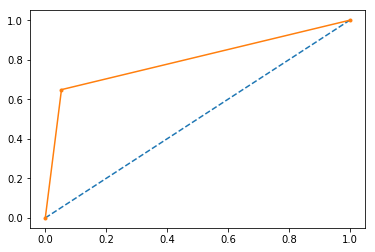

In [91]:
# calculate AUC
auc = roc_auc_score(ytest, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [92]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(gb,'GB_CENSUS.pkl')

['GB_CENSUS.pkl']